In [1]:
import glob
import re
import os
import sys
import kipoi
import numpy as np
import datetime
import warnings
import pandas as pd
import matplotlib.pyplot as plt
start = datetime.datetime.now()

old_stdout = sys.stdout
sys.stdout = open(os.devnull, "w")
model = kipoi.get_model('DeepSEA/predict')
sys.stdout = old_stdout
batch_size=100
#sys.argv=[" ","5_158526788",5000,"gene_name",1,100,500000]
sys.argv=[" ","2_127864931",5000,"BIN1",1,100,500000]
sys.argv[2]=int(sys.argv[2])
sys.argv[4]=int(sys.argv[4])
sys.argv[5]=int(sys.argv[5])
sys.argv[6]=int(sys.argv[6])
#print(sys.argv[1])
with open("temp/"+sys.argv[1]+"/expression/"+sys.argv[1]+".tsv") as f:
    content = f.readlines()

content = [x.strip() for x in content]
content[0] = content[0].split()
content[1] = content[1].split()
answ=np.empty([sys.argv[2],445,919])
expr=np.empty([445])
i=0


FileNotFoundError: [Errno 2] No such file or directory: 'temp/2_127864931/expression/2_127864931.tsv'

In [2]:
for g in sorted(glob.glob("temp/"+sys.argv[1]+"/fa_output/out"+sys.argv[1]+"_*.fa.gz")):
    dl_kwargs = {'intervals_file': 'temp/'+sys.argv[1]+'/intervals/'+os.path.splitext(os.path.basename(g))[0], 'fasta_file': g, "num_chr_fasta": "False"}
    warnings.filterwarnings('ignore',category=FutureWarning)
    dl = model.default_dataloader(**dl_kwargs)
    #it = dl.batch_iter(batch_size=sys.argv[2])
    it = dl.batch_iter(batch_size=batch_size)
    for b in range(0,sys.argv[2],batch_size):
        batch = next(it)
        warnings.filterwarnings('default',category=FutureWarning)
        if (sys.argv[2]<=b+batch_size):
            answ[b:sys.argv[2],i,:]=model.predict_on_batch(batch['inputs'])
        else:
            answ[b:b+batch_size,i,:]=model.predict_on_batch(batch['inputs'])
    expr[i]=content[1][content[0].index(re.split('_|\.',g)[-3])]
    i+=1

In [3]:
start_cor = datetime.datetime.now()
correlations=np.empty([919,sys.argv[2]])
for i in range(sys.argv[2]):
    correlations[:,i]=np.corrcoef(np.transpose(answ[i,:,:]),expr)[-1][:-1]

/home/antoine/miniconda3/envs/kipoi-gpu-DeepSEA__predict/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[:, None]
/home/antoine/miniconda3/envs/kipoi-gpu-DeepSEA__predict/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/antoine/miniconda3/envs/kipoi-gpu-DeepSEA__predict/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[None, :]
/home/antoine/miniconda3/envs/kipoi-gpu-DeepSEA__predict/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


'df.to_csv("correlations_para/correlations_"+sys.argv[1]+"_"+sys.argv[3]+".csv.gz")\n\n#np.savetxt("correlations_para/correlations_"+sys.argv[1]+"_"+sys.argv[3]+".csv", correlations, delimiter=",")\n\ntest_time = open("correlations_para/correlations_"+sys.argv[1]+"_"+sys.argv[3]+".time", \'w\')\ntest_time.write(str(start)+"\n"+str(start_cor)+"\n"+str(datetime.datetime.now()))\ntest_time.close()'

In [30]:
column_names = np.arange(sys.argv[4],sys.argv[6],sys.argv[5])-1-sys.argv[6]/2
with open('deepsea_postprocessing/predictor.names') as f:
    row_names = f.read().splitlines()

df = pd.DataFrame(correlations, columns=column_names, index=row_names)
"""df.to_csv("correlations_para/correlations_"+sys.argv[1]+"_"+sys.argv[3]+".csv.gz")

#np.savetxt("correlations_para/correlations_"+sys.argv[1]+"_"+sys.argv[3]+".csv", correlations, delimiter=",")

test_time = open("correlations_para/correlations_"+sys.argv[1]+"_"+sys.argv[3]+".time", 'w')
test_time.write(str(start)+"\n"+str(start_cor)+"\n"+str(datetime.datetime.now()))
test_time.close()"""

'df.to_csv("correlations_para/correlations_"+sys.argv[1]+"_"+sys.argv[3]+".csv.gz")\n\n#np.savetxt("correlations_para/correlations_"+sys.argv[1]+"_"+sys.argv[3]+".csv", correlations, delimiter=",")\n\ntest_time = open("correlations_para/correlations_"+sys.argv[1]+"_"+sys.argv[3]+".time", \'w\')\ntest_time.write(str(start)+"\n"+str(start_cor)+"\n"+str(datetime.datetime.now()))\ntest_time.close()'

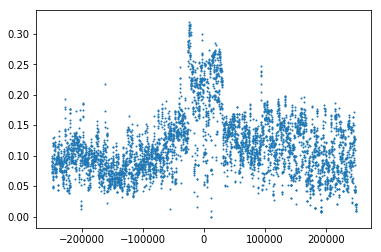

In [31]:
import matplotlib.pyplot as plt
df=df.fillna(0)
#print(list(df.abs().max().sort_values().iloc[-50:].index))
#print(df.abs().idxmax())
#df.abs().max().plot()
#plt.show()
plt.scatter(df.abs().max().index, df.abs().max(),s=1)
plt.show()

In [7]:
pos=df.abs().max().sort_values().iloc[-50:]
df[list(pos.index)].abs().mean(axis=1).sort_values()

NHEK|EZH2|None                        0.092858
Osteoblasts|H3K9me3|None              0.099977
ECC-1|ERalpha|BPA_100nM               0.100019
NH-A|EZH2|None                        0.101811
HMEC|EZH2|None                        0.103611
NHLF|EZH2|None                        0.105176
H1-hESC|DNase|None                    0.105266
ECC-1|ERalpha|Genistein_100nM         0.105945
HeLa-S3|ZKSCAN1|None                  0.106945
ECC-1|FOXA1|DMSO_0.02pct              0.107068
SK-N-SH_RA|p300|None                  0.107168
ECC-1|ERalpha|Estradiol_10nM          0.107496
K562|HDAC2|None                       0.107884
HeLa-S3|CTCF|None                     0.108019
Osteoblasts|H3K36me3|None             0.109319
H1-hESC|CTCF|None                     0.109410
WERI-Rb-1|DNase|None                  0.109821
H7-hESC|DNase|None                    0.109880
T-47D|GATA3|DMSO_0.02pct              0.109987
HepG2|ZNF274|None                     0.110117
H1-hESC|Pol2|None                     0.110367
NHDF-Ad|EZH2|

In [8]:
#get list of best positions
pos=df.abs().max().sort_values().iloc[-50:]
#get list of best mark at these positions
mark=df.abs().idxmax()[list(pos.index)]
import matplotlib.pyplot as plt

In [9]:
position_i=(df.columns.get_loc(list(pos.index)[-1]))
mark_i=(df.index.get_loc(list(mark)[-1]))

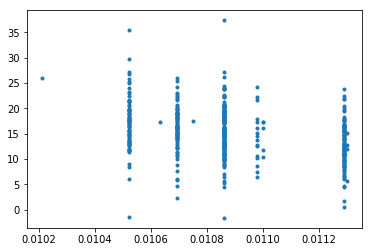

array([[ 1.       , -0.3198526],
       [-0.3198526,  1.       ]])

In [10]:
plt.plot(answ[position_i,:,mark_i] , expr,'.')
plt.show()
np.corrcoef(answ[position_i,:,mark_i] , expr)
#answ=np.empty([sys.argv[2],445,919])
#expr=np.empty([445])

In [11]:
__logBase10of2 = 3.010299956639811952137388947244930267681898814621085413104274611e-1
def RoundToSigFigs_fp( x, sigfigs ):
    """
    Rounds the value(s) in x to the number of significant figures in sigfigs.
    Return value has the same type as x.

    Restrictions:
    sigfigs must be an integer type and store a positive value.
    x must be a real value.
    """
    if not ( type(sigfigs) is int or type(sigfigs) is long or
             isinstance(sigfigs, np.integer) ):
        raise TypeError( "RoundToSigFigs_fp: sigfigs must be an integer." )

    if sigfigs <= 0:
        raise ValueError( "RoundToSigFigs_fp: sigfigs must be positive." )

    if not np.isreal( x ).all():
        raise TypeError( "RoundToSigFigs_fp: x must be real." )

    xsgn = np.sign(x)
    mantissa, binaryExponent = np.frexp( xsgn * x )

    decimalExponent = __logBase10of2 * binaryExponent
    omag = np.floor(decimalExponent)

    mantissa *= 10.0**(decimalExponent - omag)

    if mantissa < 1.0:
        mantissa *= 10.0
        omag -= 1.0

    return xsgn * np.around( mantissa, decimals=sigfigs - 1 ) * 10.0**omag

In [ ]:
#print(RoundToSigFigs_fp(answ,3))

In [14]:
np.savez_compressed('test_save_compressed',RoundToSigFigs_fp(answ,3))

MemoryError: 

In [12]:
#try to compare time with
np.round(answ,3)

array([[[0.034, 0.003, 0.021, ..., 0.042, 0.035, 0.01 ],
        [0.034, 0.003, 0.021, ..., 0.042, 0.035, 0.01 ],
        [0.034, 0.003, 0.021, ..., 0.042, 0.035, 0.01 ],
        ...,
        [0.036, 0.003, 0.022, ..., 0.042, 0.036, 0.009],
        [0.034, 0.003, 0.021, ..., 0.042, 0.035, 0.01 ],
        [0.034, 0.003, 0.021, ..., 0.042, 0.035, 0.01 ]],

       [[0.015, 0.015, 0.032, ..., 0.03 , 0.028, 0.007],
        [0.015, 0.015, 0.032, ..., 0.03 , 0.028, 0.007],
        [0.015, 0.015, 0.032, ..., 0.03 , 0.028, 0.007],
        ...,
        [0.016, 0.016, 0.034, ..., 0.031, 0.029, 0.007],
        [0.015, 0.015, 0.032, ..., 0.03 , 0.028, 0.007],
        [0.015, 0.015, 0.032, ..., 0.03 , 0.028, 0.007]],

       [[0.038, 0.106, 0.06 , ..., 0.028, 0.028, 0.007],
        [0.038, 0.106, 0.06 , ..., 0.028, 0.028, 0.007],
        [0.038, 0.106, 0.06 , ..., 0.028, 0.028, 0.007],
        ...,
        [0.039, 0.105, 0.063, ..., 0.029, 0.029, 0.007],
        [0.038, 0.106, 0.06 , ..., 0.028, 0.0